# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

🔹 Dimensiones del dataset: (400000, 6)

🔹 Primeras filas del dataset:
   Price  Year  Mileage State       Make      Model
0  34995  2017     9913    FL       Jeep   Wrangler
1  37895  2015    20578    OH  Chevrolet   Tahoe4WD
2  18430  2012    83716    TX        BMW      X5AWD
3  24681  2014    28729    OH   Cadillac  SRXLuxury
4  26998  2013    64032    CO       Jeep   Wrangler

 Columnas disponibles en el dataset:
['Price', 'Year', 'Mileage', 'State', 'Make', 'Model']

🔹 Valores nulos por columna:
Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

🔹 Estadísticas descriptivas:
               Price           Year       Mileage
count  400000.000000  400000.000000  4.000000e+05
mean    21146.919312    2013.198125  5.507296e+04
std     10753.664940       3.292326  4.088102e+04
min      5001.000000    1997.000000  5.000000e+00
25%     13499.000000    2012.000000  2.584100e+04
50%     18450.000000    2014.000000  4.295500e+04
75%     26999.000000    

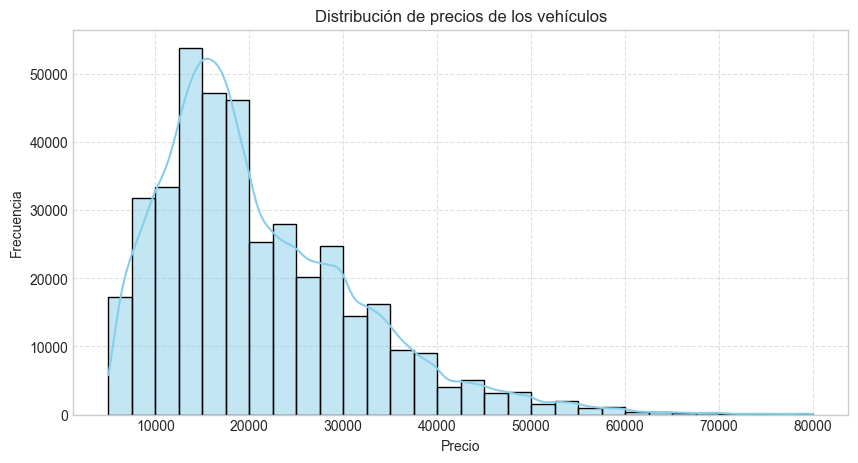

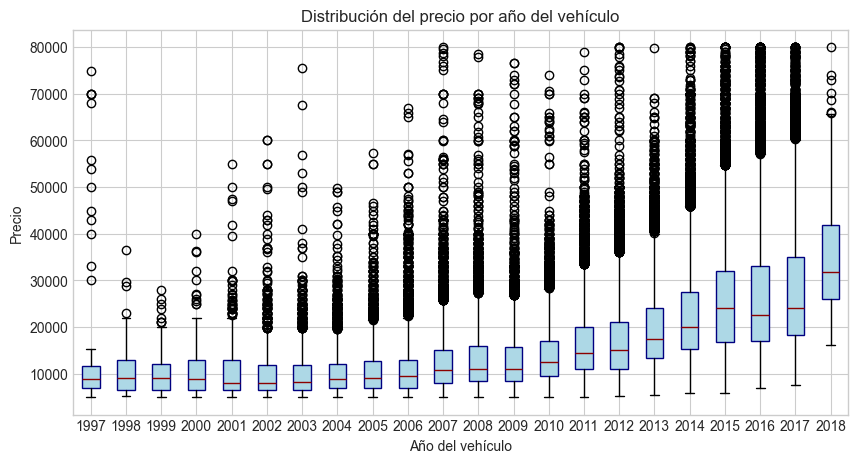

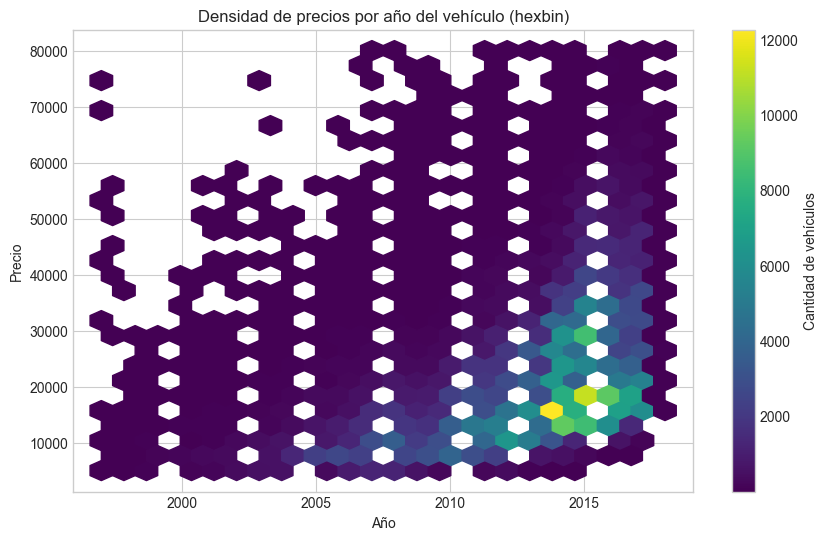

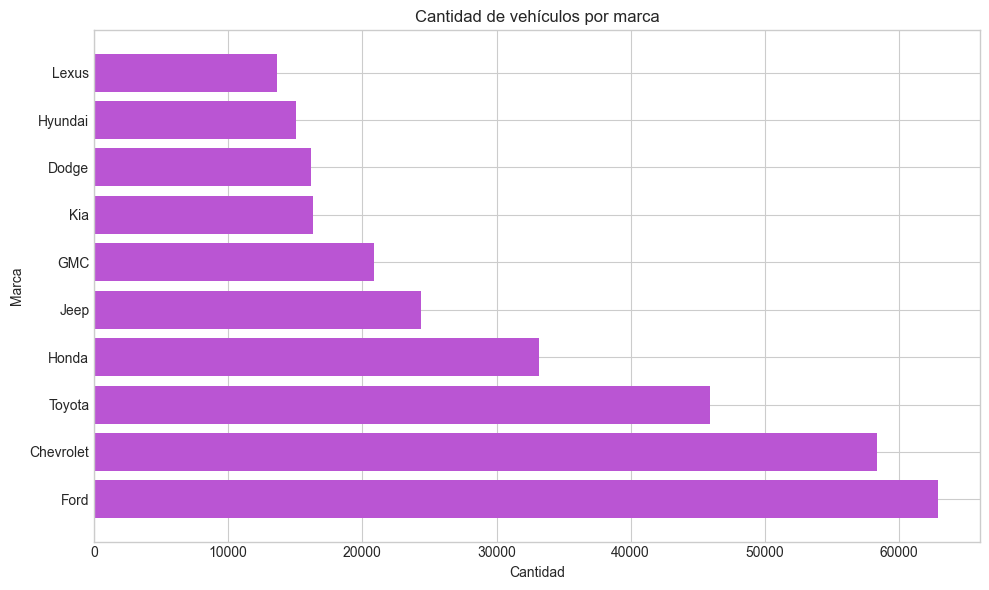

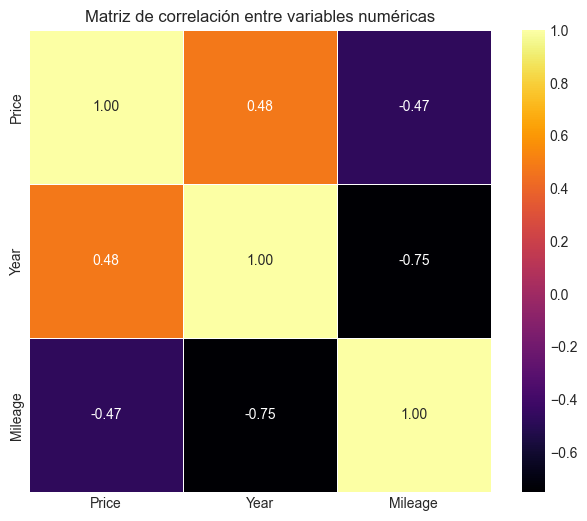

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

data = pd.read_csv("https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip")

print("🔹 Dimensiones del dataset:", data.shape)
print("\n🔹 Primeras filas del dataset:")
print(data.head())

print("\n Columnas disponibles en el dataset:")
print(data.columns.tolist())

print("\n🔹 Valores nulos por columna:")
print(data.isnull().sum())

# Reemplazamos valores faltantes numéricos por la mediana
data.fillna(data.median(numeric_only=True), inplace=True)

print("\n🔹 Estadísticas descriptivas:")
print(data.describe())

if 'Make' in data.columns:
    conteo_marcas = data['Make'].value_counts().head(10)
    print("\n Top 10 marcas con más autos registrados:")
    print(conteo_marcas)


if 'Price' in data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')
    plt.title("Distribución de precios de los vehículos")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


if 'Price' in data.columns and 'Year' in data.columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(
        [data[data['Year'] == year]['Price'] for year in sorted(data['Year'].unique())],
        labels=sorted(data['Year'].unique()),
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='navy'),
        medianprops=dict(color='darkred')
    )
    plt.title('Distribución del precio por año del vehículo')
    plt.xlabel('Año del vehículo')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

if 'Price' in data.columns and 'Year' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.hexbin(data['Year'], data['Price'], gridsize=25, cmap='viridis', mincnt=1)
    plt.colorbar(label='Cantidad de vehículos')
    plt.title('Densidad de precios por año del vehículo (hexbin)')
    plt.xlabel('Año')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

if 'Make' in data.columns:
    conteo = data['Make'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(conteo.index, conteo.values, color='mediumorchid')
    plt.title('Cantidad de vehículos por marca')
    plt.xlabel('Cantidad')
    plt.ylabel('Marca')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(8, 6))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='inferno', square=True, linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip")

data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

X = data.drop(['Price'], axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n🌲 Desempeño del modelo Random Forest:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")



🌲 Desempeño del modelo Random Forest:
MAE:  1314.42
RMSE: 1765.41
R²:   0.80


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split

# Lectura del dataset
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)

data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

y = data['Price']
X = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("✅ Datos cargados y divididos correctamente.")
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


✅ Datos cargados y divididos correctamente.
Tamaño de entrenamiento: (7031, 9)
Tamaño de prueba: (3464, 9)


In [38]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\n Desempeño del modelo ajustado:")
print(f"MAE:  {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²:   {r2_best:.2f}")

print("\n Mejores parámetros encontrados:")
print(grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits

 Desempeño del modelo ajustado:
MAE:  1146.84
RMSE: 1564.25
R²:   0.84

 Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}


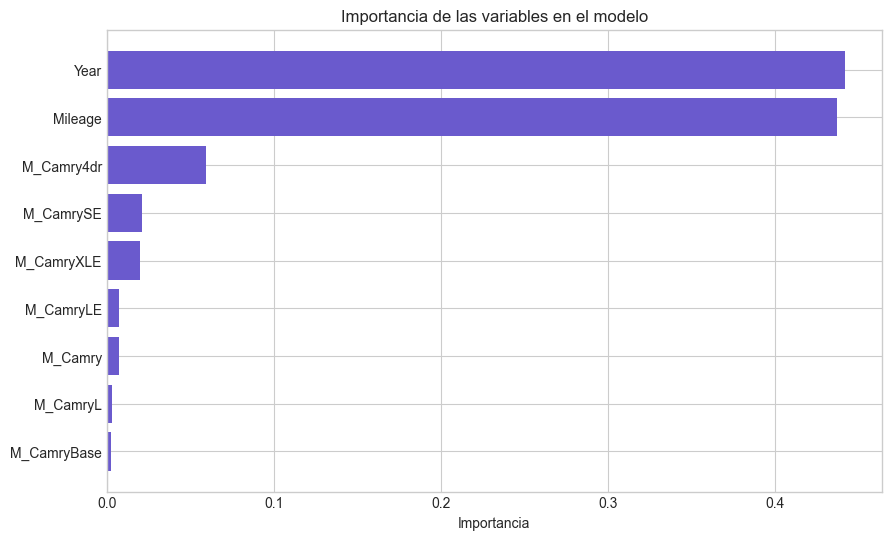


 Ranking de importancia de variables:
       Feature  Importance
0         Year    0.442002
1      Mileage    0.437341
3   M_Camry4dr    0.059343
7    M_CamrySE    0.021264
8   M_CamryXLE    0.019786
6    M_CamryLE    0.007485
2      M_Camry    0.007246
5     M_CamryL    0.003161
4  M_CamryBase    0.002372


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='slateblue')
plt.xlabel('Importancia')
plt.title('Importancia de las variables en el modelo')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("\n Ranking de importancia de variables:")
print(importances)



### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

 Resultados del modelo Random Forest:

  Métrica    Valor
0     MAE  1146.84
1    RMSE  1564.25
2      R²     0.84


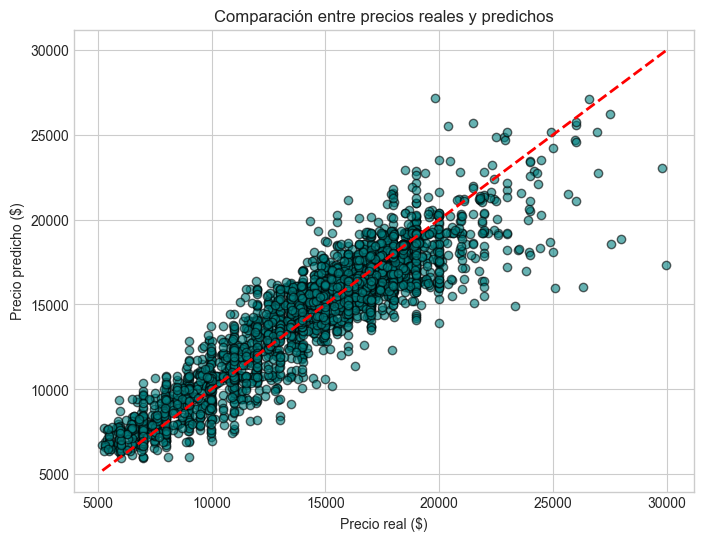

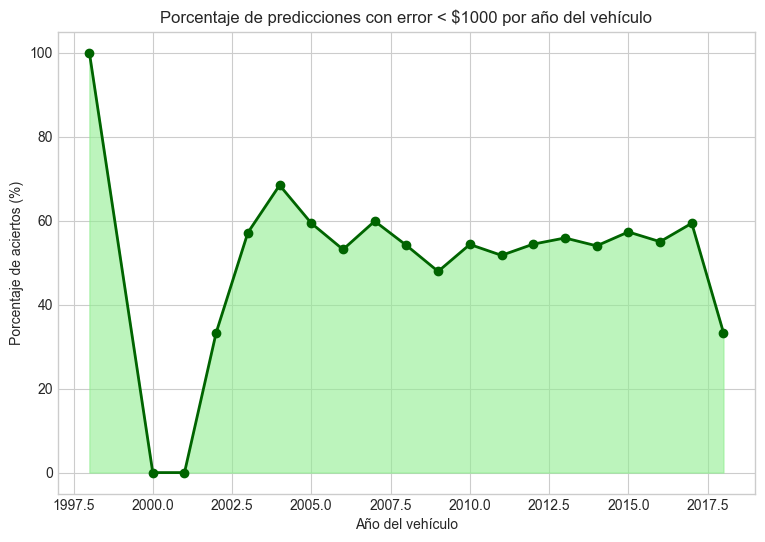


 CONCLUSIONES:
- El modelo obtuvo un R² de 0.84, explicando el 84.0% de la variabilidad en los precios.
- El MAE fue de $1,147 y el RMSE de $1,564.
- La mayoría de los puntos están cerca de la línea roja, mostrando un buen ajuste.
- Los años con más aciertos suelen ser los más recientes, indicando mejor desempeño en autos nuevos.
- Las variables más influyentes fueron el año, el kilometraje y el modelo del vehículo.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

resultados = pd.DataFrame({
    "Métrica": ["MAE", "RMSE", "R²"],
    "Valor": [round(mae, 2), round(rmse, 2), round(r2, 3)]
})

print(" Resultados del modelo Random Forest:\n")
print(resultados)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', color='teal')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.title("Comparación entre precios reales y predichos")
plt.xlabel("Precio real ($)")
plt.ylabel("Precio predicho ($)")
plt.grid(True)
plt.show()

errores = abs(y_test - y_pred)
aciertos = (errores < 1000).astype(int)

porcentaje_por_año = pd.DataFrame({
    'Año': X_test['Year'],
    'Acierto': aciertos
}).groupby('Año').mean() * 100

plt.figure(figsize=(9,6))
plt.fill_between(porcentaje_por_año.index, porcentaje_por_año['Acierto'],
                 color='lightgreen', alpha=0.6)
plt.plot(porcentaje_por_año.index, porcentaje_por_año['Acierto'],
         color='darkgreen', marker='o', linewidth=2)
plt.title('Porcentaje de predicciones con error < $1000 por año del vehículo')
plt.xlabel('Año del vehículo')
plt.ylabel('Porcentaje de aciertos (%)')
plt.grid(True)
plt.show()

print("\n CONCLUSIONES:")
print(f"- El modelo obtuvo un R² de {r2:.2f}, explicando el {r2*100:.1f}% de la variabilidad en los precios.")
print(f"- El MAE fue de ${mae:,.0f} y el RMSE de ${rmse:,.0f}.")
print("- La mayoría de los puntos están cerca de la línea roja, mostrando un buen ajuste.")
print("- Los años con más aciertos suelen ser los más recientes, indicando mejor desempeño en autos nuevos.")
print("- Las variables más influyentes fueron el año, el kilometraje y el modelo del vehículo.")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.